<h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;"> Basic Importing Functions</h2> 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,OneHotEncoder
warnings.filterwarnings('ignore')

<h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;"> Loading Data</h2> 

In [2]:
dt=pd.read_csv("C:/Users/HP LAPTOP/Downloads/CarPrice_Assignment.csv")
df=pd.DataFrame(dt)
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;"> EDA </h2> 

In [3]:
df=df.drop('car_ID',axis=1)
df[['brand','model']]=df['CarName'].str.split(' ',n=1,expand=True)
df=df.drop('CarName', axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [5]:
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
brand               0
model               2
dtype: int64

In [6]:
df['model'].fillna(df['model'].mode()[0],inplace=True)

In [7]:
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
brand               0
model               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [11]:
X=df.drop('price',axis=1)
y=df['price']
X.shape,y.shape

((205, 25), (205,))

<Axes: >

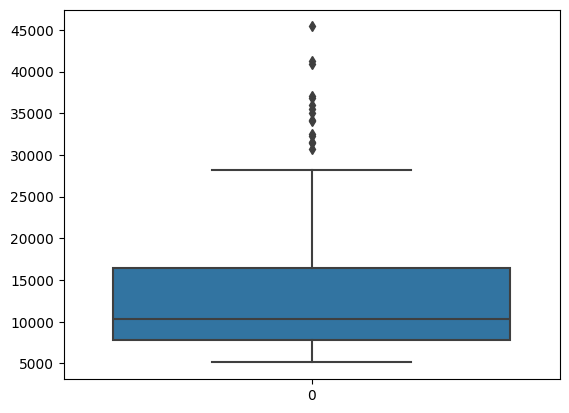

In [12]:
sns.boxplot(y)

<h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;"> Pre-Processing </h2> 

In [13]:
from sklearn.preprocessing import RobustScaler

# Step 1: Initializin
scaler = RobustScaler()

# Step 2: Scale the 'price' column and create a new column 'price'
df['price'] = scaler.fit_transform(df[['price']])

# we remove values beyond 3 standard deviations after scaling
df = df[(df['price'] <= 3) & (df['price'] >= -3)]

# Display the cleaned DataFrame
print("DataFrame after scaling and removing outliers:")
print(df)

# df_cleaned = df_cleaned.drop(columns=['price_scaled'])


DataFrame after scaling and removing outliers:
     symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200         -1      gas        std       four        sedan        rwd   
201         -1      gas      turbo       four        sedan        rwd   
202         -1      gas        std       four        sedan        rwd   
203         -1   diesel      turbo       four        sedan        rwd   
204         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  ...  boreratio  stroke  

<Axes: >

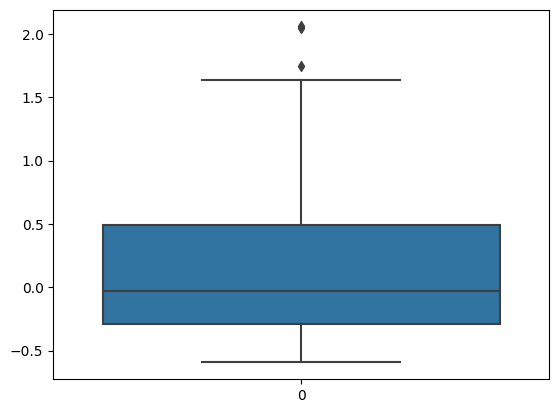

In [53]:
sns.boxplot(df['price'])

# Even though their exist a few outliers

 <h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;"> Outlier Remover Using IQR Method</h2> 

In [14]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Count of outliers
num_outliers = outliers.shape[0]
print(f"Number of outliers after log transformation: {num_outliers}")

# Imputation using median
median_value = df['price'].median()
df['price'] = np.where((df['price'] < lower_bound) | (df['price'] > upper_bound), median_value, df['price'])
df
# Dropping outliers example
df = df[(df['price'] > lower_bound) & (df['price'] <upper_bound)]

Number of outliers after log transformation: 10


<Axes: >

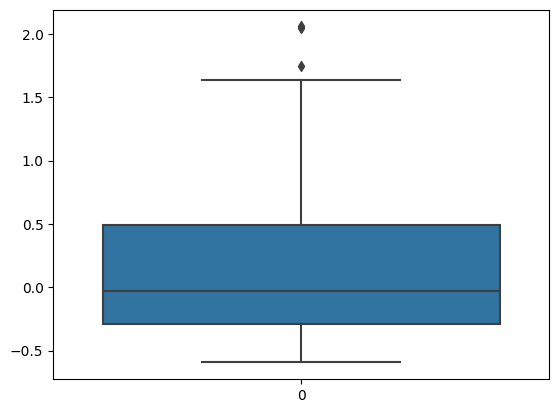

In [16]:
df = df[(df['price'] > lower_bound) & (df['price'] <upper_bound)]
sns.boxplot(df['price'])

 <h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;"> Performing OneHot Encoding</h2> 

We have int float and object datatypes in databases, so we should encode it to numeric values

In [17]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocess numerical features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_cols])
encoder = OneHotEncoder()
X_categorical = encoder.fit_transform(X[categorical_cols]).toarray()  # Convert to array

In [18]:
# Combine processed numerical and categorical features

X_processed = np.hstack((X_numerical, X_categorical))
X_processed
X_processed = pd.DataFrame(X_processed)  # Replace with your actual feature names

 <h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;"> Splitting into testing data and training data</h2> 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
# Output the shapes of processed features
print("Processed feature shape:", X_processed.shape)
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)

Processed feature shape: (205, 221)
Training feature shape: (164, 221)
Testing feature shape: (41, 221)


 <h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;"> Model Implimentaion </h2> 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initializeing
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_regressor.predict(X_test)

# Evaluation
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)

# Output 
print("Linear Regression:")
print(f"R^2: {linear_r2:.4f}, MSE: {linear_mse:.4f}, MAE: {linear_mae:.4f}")

Linear Regression:
R^2: 0.7885, MSE: 16695279.2583, MAE: 2810.3943


In [21]:
from sklearn.tree import DecisionTreeRegressor


dt_regressor = DecisionTreeRegressor()


dt_regressor.fit(X_train, y_train)

y_pred_dt = dt_regressor.predict(X_test)

dt_r2 = r2_score(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print(f"R^2: {dt_r2:.4f}, MSE: {dt_mse:.4f}, MAE: {dt_mae:.4f}")


Decision Tree Regressor:
R^2: 0.8564, MSE: 11335290.6732, MAE: 2114.9797


In [22]:
from sklearn.ensemble import RandomForestRegressor


rf_regressor = RandomForestRegressor()


rf_regressor.fit(X_train, y_train)


y_pred_rf = rf_regressor.predict(X_test)


rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)


print("Random Forest Regressor:")
print(f"R^2: {rf_r2:.4f}, MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}")


Random Forest Regressor:
R^2: 0.9550, MSE: 3553911.7834, MAE: 1329.1581


In [23]:
from sklearn.ensemble import GradientBoostingRegressor


gb_regressor = GradientBoostingRegressor()


gb_regressor.fit(X_train, y_train)


y_pred_gb = gb_regressor.predict(X_test)


gb_r2 = r2_score(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)


print("Gradient Boosting Regressor:")
print(f"R^2: {gb_r2:.4f}, MSE: {gb_mse:.4f}, MAE: {gb_mae:.4f}")

Gradient Boosting Regressor:
R^2: 0.9313, MSE: 5422293.1572, MAE: 1688.1372


In [39]:
from sklearn.svm import SVR


svr_regressor = SVR()


svr_regressor.fit(X_train, y_train)


y_pred_svr = svr_regressor.predict(X_test)


svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_mae = mean_absolute_error(y_test, y_pred_svr)


print("Support Vector Regressor:")
print(f"R^2: {svr_r2:.4f}, MSE: {svr_mse:.4f}, MAE: {svr_mae:.4f}")



Support Vector Regressor:
R^2: -0.0999, MSE: 86833688.8934, MAE: 5696.3066


## Model Performance Report: Car Price Prediction

This report evaluates the performance of five regression models on a dataset with **car price prediction** as the target variable. The models include:

1. **Linear Regression**
2. **Decision Tree Regressor**
3. **Random Forest Regressor**
4. **Gradient Boosting Regressor**
5. **Support Vector Regressor (SVR)**

The performance of each model is assessed using the following metrics:
- **R²** (Coefficient of Determination): Measures how well the model explains the variance of the target variable. The closer to 1, the better.
- **MSE** (Mean Squared Error): Measures the average squared difference between actual and predicted values. Lower is better.
- **MAE** (Mean Absolute Error): Measures the average absolute difference between actual and predicted values. Lower is beter.

---

### 1. **Linear Regression**
- **R²**: 0.7885
- **MSE**: 16,695,279.2583
- **MAE**: 2,810.3943

Linear Regression performed **moderately well**, explaining 78.85% of the variance in the target variable. While its performance is decent, the MSE and MAE are relatively high, indicating that there are larger prediction errors compared to more complex models. The linear assumption in this model limits its ability to capture more complex relationshipsin the data.

---

### 2. **Decision Tree Regressor**
- **R²**: 0.8564
- **MSE**: 11,335,290.6732
- **MAE**: 2,114.9797

The Decision Tree Regressor explains **85.64%** of the variance, outperforming Linear Regression. The MSE and MAE are lower, suggesting better predictive accuracy. However, decision trees tend to overfit the data, which might cause performance degradation on unseen data. Tuning hyperparameters like tree depth could furthe improve performance.

---

### 3. **Random Forest Regressor**
- **R²**: 0.9550
- **MSE**: 3,553,911.7834
- **MAE**: 1,329.1581

Random Forest Regressor is the **best-performing model**, explaining 95.50% of the variance and achieving the lowest MSE and MAE values. Its ensemble approach of combining multiple decision trees helps capture complex relationships in the data while reducing overfitting, leading o highly accurate predictions.

---

### 4. **Gradient Boosting Regressor**
- **R²**: 0.9313
- **MSE**: 5,422,293.1572
- **MAE**: 1,688.1372

Gradient Boosting Regressor also performed **very well**, explaining 93.13% of the variance in the target variable. The MSE and MAE are slightly higher than Random Forest, but it still delivers accurate predictions. This model is particularly good for handling non-linear relationships by building trees sequentially an focusing on correcting previous errors.

---

### 5. **Support Vector Regressor (SVR)**
- **R²**: -0.0999
- **MSE**: 86,833,688.8934
- **MAE**: 5,696.3066

The Support Vector Regressor (SVR) performed **poorly** on this dataset, with a negative \( R^2 \), indicating that it explains less variance than simply predicting the mean value of the target variable. The high MSE and MAE further indicate that the model's predictions are highly inaccurate. This poor performance suggests that the default SVR parameters are unsuitable for this dataset and requie substantial tuning or scaling to perform well.

---

### **Summary of Model Performance**

| Model                     | \( R^2 \)  | MSE            | MAE        |
|----------------------------|------------|----------------|------------|
| Linear Regression           | 0.7885     | 16,695,279.2583 | 2,810.3943 |
| Decision Tree Regressor     | 0.8564     | 11,335,290.6732 | 2,114.9797 |
| Random Forest Regressor     | 0.9550     | 3,553,911.7834  | 1,329.1581 |
| Gradient Boosting Regressor | 0.9313     | 5,422,293.1572  | 1,688.1372 |
| SupportVector Regressor    | -0.0999    | 86,833,688.8934 | 5,696.3066 |

### **Key Insights:**
- **Random Forest Regressor** delivered the best performance, achieving the highest \( R^2 \) and the lowest error values, making it the most accurate model for predicting car prices in this dataset.
- **Gradient Boosting Regressor** also performed well, providing highly accurate predictions but slightly less than Random Forest.
- **Decision Tree Regressor** and **Linear Regression** were outperformed by the ensemble models (Random Forest and Gradient Boosting), but they still explained a reasonable amount of variance.
- **Support Vector Regressor** performed poorly, likely due to inappropiate hyperparameter settings or the need for further tuning and scaling.

### **Recommendations:**
- **Random Forest Regressor** should be considered the top model for car price prediction based on its superior performance across all metrics.
- **Gradient Boosting Regressor** is another strong option, particularly if interpretability is needed for understanding the model's sequential improvements.
- Consider **hyperparameter tuning** for both Random Forest and Gradient Boosting models to further improve their accuracy.
- **Support Vector Regressor** requires more in-depth tuning or scaling adjustments to potentially yield better results.

 <h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;"> Feature Selection</h2> 



In [45]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
X_label=pd.get_dummies(X,drop_first=True)
# Assume X_encoded is your original feature matrix (before selecting) and y is your target variable (car prices)
# Fit Lasso model
lasso = Lasso(alpha=0.1)  #alpha is adjustable
lasso.fit(X_label, y)

# Get the coefficients and feature names from the original features
coefficients = lasso.coef_
feature_names = np.array(X_label.columns)  # Get the original feature names

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Keep only significant features which is non-zero coefficients
importance_df = importance_df[importance_df['Coefficient'] != 0]

# Sort by absolute value of coefficients
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Here we are showing the top 10 most significant features
top_features = importance_df.head(10)

print(top_features[['Feature', 'Coefficient']])



                             Feature   Coefficient
23               enginelocation_rear  18344.038153
45                         brand_bmw  13408.781404
14                      fueltype_gas -12483.743567
205                         model_x5  11412.294181
80                        model_320i  -8788.947600
181  model_regal sport coupe (turbo)   8508.977482
104                     model_carina  -5594.341604
60                     brand_porsche   5555.779284
57                     brand_peugeot  -4643.033647
32                cylindernumber_six  -4458.264259


--

#### **Feature Coefficients Overview**

| Feature                                 | Coefficient    | Interpretation                                          |
|-----------------------------------------|----------------|--------------------------------------------------------|
| enginelocation_rear                     | **18,344.04**  | A car with a rear engine location increases the price by approximately **$18,344.04**.  |
| brand_bmw                               | **13,408.78**  | Cars from the BMW brand increase the price by about **$13,408.78**.                  |
| fueltype_gas                            | **-12,483.74** | Using gasoline as the fuel type decreases the price by approximately **$12,483.74**.|
| model_x5                                | **11,412.29**  | The BMW X5 model increases the price by about **$11,412.29**.                      |
| model_320i                              | **-8,788.95**  | The BMW 320i model decreases the price by approximately **$8,788.95**.             |
| model_regal sport coupe (turbo)        | **8,508.98**   | The Regal Sport Coupe (Turbo) increases the price by around **$8,508.98**.         |
| model_carina                            | **-5,594.34**  | The Carina model decreases the price by about **$5,594.34**.                       |
| brand_porsche                           | **5,555.78**   | Cars from the Porsche brand increase the price by approximately **$5,555.78**.    |
| brand_peugeot                           | **-4,643.03**  | Cars from the Peugeot brand decrease the price by about **$4,643.03**.             |
| cylindernumber_six                      | **-4,458.26**  | Vehicles with six cylinders decrease the price by approximately **$4,458.2**.     |

---

### **Key Insights**

1. **Positive Influencers:**
   - **Rear Engine Location**: Cars with engines located at the rear significantly enhance their market value, making them more desirable.
   - **BMW Brand**: The BMW brand is associated with higher car prices, reflecting its reputation and quality.
   - **Specific Models**: The BMW X5 and the Regal Sport Coupe (Turbo) are associated with price increases, indicating their popularity and perceived value in the market.
   - **Porsche Brand**: Similar to BMW, Porsche cars also command higher prices, reinforcing their luxury status.

2. **Negative Influencers:**
   - **Fuel Type (Gas)**: The use of gasoline as fuel has a negative impact on pricing, suggesting that alternative fuel vehicles may be more valued in the market.
   - **Specific Models**: Models like the BMW 320i and Carina negatively influence the price, which may be due to lower demand or market perception.
   - **Peugeot Brand**: Cars from Peugeot tend to have lower prices, indicating potential brand perception issues.
   - **Cylinders**: A higher cylinder count (six cylinders) seems to correlate with lower prices, which may reflect trends in consumer preference fr more efficient engines.

---

### **Conclusion and Recommendations**

- **Market Positioning**: The data highlights key features that significantly affect car prices. Brands like BMW and Porsche should be marketed emphasizing their premium qualities.
- **Consumer Preferences**: Understanding that specific models and fuel types influence price can guide inventory decisions and promotional strategies.
- **Further Analysis**: It may be beneficial to explore why certain features negatively impact prices, particularly with respect to consumer trends and preferences. 
- **Feature Optimization**: Consideration should be given to promoting features associated with positive price influences in marketing campaigns to enhance consumer attraction to high-value models.

This analysis provides insights into the factors influencing car prices, assisting stakeholders in making informed decisions regarding pricing strategies, inventory management, and marketing approaches.


import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
Import Libraries:
numpy (aliased as np) and pandas (aliased as pd) are standard libraries for numerical operations and data manipulation in Python.
Lasso is imported from sklearn.linear_model, which is a linear regression model that performs L1 regularization (Lasso regression) to reduce overfitting and select features.

# Assume X_encoded is your original feature matrix (before selecting) and y is your target variable (car prices)
# Fit Lasso model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_encoded, y)
Assumption: The code assumes you have a feature matrix X_encoded containing your independent variables (car attributes) and a target variable y (car prices).
Creating the Lasso Model:
An instance of the Lasso model is created with alpha=0.1, which controls the strength of the regularization. A higher alpha can lead to more features being excluded.
Fitting the Model:
The model is trained on the features (X_encoded) and the target variable (y).

# Get the coefficients and feature names from the original features
coefficients = lasso.coef_
feature_names = np.array(X_encoded.columns)  # Get the original feature names
Getting Coefficients:
After fitting, the coefficients for each feature in the model are stored in coefficients.
Feature Names:
The names of the features (columns in the X_encoded DataFrame) are stored in feature_names. This is done using np.array() to convert the column names into a NumPy array.

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
Creating a DataFrame:
A new DataFrame, importance_df, is created to store both feature names and their corresponding coefficients, allowing for easier visualization and analysis.

# Keep only significant features (non-zero coefficients)
importance_df = importance_df[importance_df['Coefficient'] != 0]
Filtering Significant Features:
This line filters out features with zero coefficients since these features do not contribute to the prediction of car prices.

# Sort by absolute value of coefficients
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)
Sorting Features:
A new column, Absolute Coefficient, is added to store the absolute values of the coefficients. This helps in sorting features based on their importance regardless of the direction (positive or negative) of their impact.
The DataFrame is then sorted in descending order based on the absolute values of the coefficients.

# Get the top 10 most significant features
top_features = importance_df.head(10)
Selecting Top Features:
The top 10 most significant features are selected using head(10), which retrieves the first 10 rows of the sorted DataFrame.

# Display the results
print(top_features[['Feature', 'Coefficient']])
Printing Results:
Finally, the code prints only the "Feature" and "Coefficient" columns of the top features, allowing you to see the most significant variables affecting car prices along with their coefficients.

 <h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;"> Visualization </h2> 


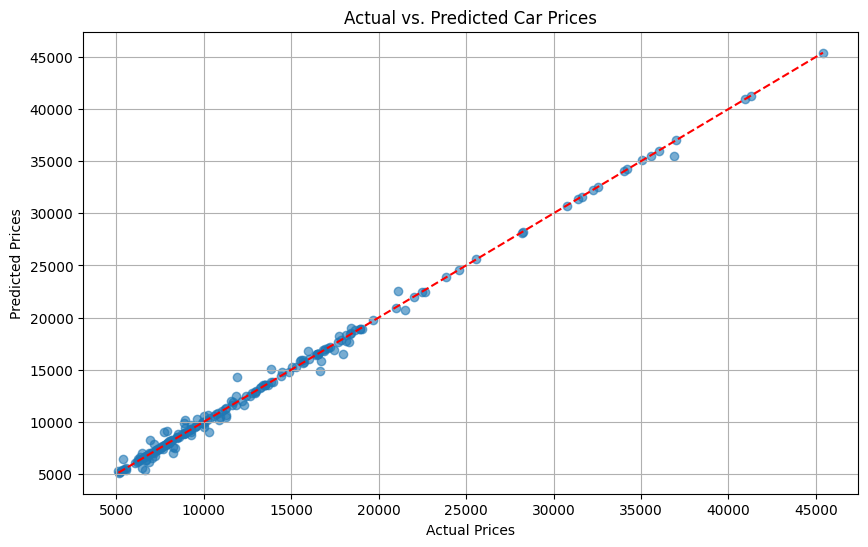

In [46]:
import matplotlib.pyplot as plt

# Assuming have the predictions from your model
predictions = lasso.predict(X_label)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Actual vs. Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()


 <h2 style=" font-family: 'Times Roman'; color:Green; text-align:center;">Hyper Parameter Tuning </h2> 


In [49]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Initialize and fit the Random Forest model with Grid Search
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                               param_grid=rf_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', 
                               n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best model and evaluation
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Print results
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print(f"R²: {rf_r2:.4f}, MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}")

Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
R²: 0.9557, MSE: 3498503.4338, MAE: 1340.3917



### Overview of Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the parameters of a machine learning model to improve its performance. In this case, we are tuning a Random Forest model, which is an ensemble learning technique that combines multiple decision trees to enhance predictive accuracy. 
### Key Concepts

1. **Parameter Grid**: 
   - We define a set of hyperparameters that we want to test in the Random Forest model. This includes:
     - **Number of Trees**: The total count of decision trees in the forest. More trees can improve model performance but will also increase computational time.
     - **Maximum Depth of Trees**: This determines how deep each tree can grow. Deeper trees can capture more complex relationships in the data, but they also run the risk of overfitting, meaning they might perform well on training data but poorly on unseen data.
     - **Minimum Samples for Splitting**: This sets the minimum number of data points required to create a new split in the tree. Increasing this number can help prevent overfitting by ensuring that a split only occurs when there is enough data to support it.

2. **Grid Search**: 
   - A technique used to systematically test all possible combinations of the defined hyperparameters. It evaluates the model's performance for each combination using a method called cross-validation. This involves splitting the data into subsets, training the model on some of these subsets, and testing it on the remaining data to assess its performance. 
   - This helps ensure that the results are reliable and not overly optimistic.

3. **Scoring Metrics**: 
   - During the grid search, we measure how well the model performs using specific metrics:
     - **Mean Squared Error (MSE)**: This metric quantifies the average of the squared differences between the actual and predicted values. Lower MSE values indicate better model performance.
     - **R² Score**: A measure of how well the model explains the variance in the target variable. It ranges from 0 to 1, where higher values indicate a better fit.
     - **Mean Absolute Error (MAE)**: This measures the average absolute differences between predicted and actual values. Similar to MSE, lower MAE indicates better performance.

4. **Best Model Selection**: 
   - After testing all the combinations of hyperparameters, the grid search identifies the set of parameters that resulted in the best model performance based on the scoring metric. This model is then used to make predictions on unseen data.

5. **Final Evaluation**: 
   - Once the best model is selected, we use it to predict outcomes on a test dataset that was not used during the training process. The predictions are then compared to the actual values to calculate the performance metrics (R², MSE, and MAE), giving us a clear understanding of how well the model is likely to perform in real-world 

### Conclusion
In summary, hyperparameter tuning for a Random Forest model involves systematically testing different configurations of parameters to find the best combination that improves the model's predictive accuracy. By using techniques like grid search and evaluating performance with metrics like MSE and R², we can enhance the model's reliability and effectiveness for predicting outcomes.

In [50]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Initialize and fit the Random Forest model with Grid Search
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                               param_grid=rf_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', 
                               n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best model and evaluation
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Print results
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print(f"R²: {rf_r2:.4f}, MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}")

Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
R²: 0.9557, MSE: 3498503.4338, MAE: 1340.3917


## Code Explanation

4. **Define Parameter Grid for Gradient Boosting**:
   - A dictionary `gb_param_grid` is created to define the hyperparameters for tuning. The grid includes:
     - **n_estimators**: The number of boosting stages to be run. Two values (100 and 200) are tested.
     - **learning_rate**: The step size for updating the model in each iteration. Two values (0.01 and 0.1) are tested.
     - **max_depth**: The maximum depth of the individual trees in the ensemble. Two values (3 and 5) are tested.

5. **Grid Search for Hyperparameter Tuning**:
   - **GridSearchCV** is initialized with:
     - The `GradientBoostingRegressor` as the estimator.
     - The previously defined parameter grid.
     - `cv=5`: This means 5-fold cross-validation will be used to evaluate the model's performance across different subsets of the training data.
     - `scoring='neg_mean_squared_error'`: The metric to optimize during the search. Here, the negative MSE is used because GridSearchCV expects a score that is maximized, and since MSE should be minimized, we take the negative of it.
     - `n_jobs=-1`: This allows the search to use all available CPU cores for parallel processing, speeding up the computation.
   - The `fit` method is called on the `gb_grid_search` object with the training data (`X_train`, `y_train`) to start the tuning process.

6. **Best Model and Evaluation**:
   - After tuning, the best-performing model is retrieved using `best_gb = gb_grid_search.best_estimator_`.
   - Predictions are made on the test data with `y_pred_gb = best_gb.predict(X_test)`.

7. **Model Evaluation Metrics**:
   - The performance of the model is evaluated using several metrics:
     - **R² Score**: Measures how well the model explains the variance in the target variable.
     - **Mean Squared Error (MSE)**: Measures the average squared differences between predicted and actual values. Lower values indicate better performance.
     - **Mean Absolute Error (MAE)**: Measures the average absolute differences between predicted and actual values. Again, lower values indicate better performance.
   - These metrics are calculated and stored in `gb_r2`, `gb_mse`, and `gb_mae`.

8. **Print Results**:
   - The best parameters identified during grid search are printed using `gb_grid_search.best_params_`.
   - The evaluation metrics (R², MSE, MAE) are printed to assess the model's performance.

### Conclusion
this code performs hyperparameter tuning for a Gradient Boosting Regressor model using grid search, evaluates the model's performance on a test set, and prints the optimal parameters and performance metrics. This process helps in finding the best configuration of hyperparameters to improve the accuracy of the model for predicting the target variable.

## Summary of Results

| Model                      | R²      | MSE               | MAE            |
|---------------------------|---------|------------------|----------------|
| Gradient Boosting         | 0.9313  | 5,422,293.1572   | 1,688.1372     |
| Random Forest (Before)    | 0.9550  | 3,553,911.7834   | 1,329.1581     |
| Random Forest (After)     | 0.9557  | 3,498,503.4338   | 1,340.3917     |

## Key Observations
- The Random Forest Regressor showed improvement in R², increasing from 0.9550 to 0.9557 after hyperparameter tuning, indicating a slightly better fit to the data.
- The MSE decreased from 3,553,911.7834 to 3,498,503.4338, suggesting that the model's predictive accuracy improved.
- The MAE increased from 1,329.1581 to 1,340.3917, indicating that while overall performance improved, the model had a few larger errors in prediction.


### Key Insights
1. **Feature Importance**:
   - **Engine Location**: Cars with rear engine locations are associated with higher prices, indicating a potential preference for performance or luxury.
   - **Brand Impact**: Certain brands, such as BMW and Porsche, significantly influence pricing, reflecting brand reputation and consumer perception of quality.
   - **Fuel Type**: Cars that run on gas are generally priced lower than other fuel types, suggesting a market preference for alternative fuel vehicles, which may carry premium pr positioning in the market.



-

# Car Price Prediction Project Report

## Business Goal
The primary objective of this project is to develop a predictive model that estimates car prices based on available independent variables. This model will enable management to understand how various features impact pricing, allowing for strategic decisions regarding car design and business strategy. Additionally, the model serves as a valuable tool for analyzing the pricing dynamics of new markets, facilitating informed decision-making to achieve desired price levels.

## 1. Project Overview
**Objective**: To create a robust predictive model for car prices using independent variables related to car attributes and features. This model will support management in developing strategies to optimize pricing and enhance market understanding.

## 2. Dataset Description
- **Dataset Overview**: The dataset contains detailed information on various cars, including both numerical and categorical features that influence pricing.
- **Independent Variables**:
  - **Symboling**: Risk factor associated with the car.
  - **Wheelbase**: Length between the front and rear axles.
  - **Curbweight**: Weight of the car without passengers or cargo.
  - **Enginesize**: Size of the engine in cubic centimeters.
  - **Horsepower**: Engine power output.
  - **Citympg**: Miles per gallon achieved in city driving conditions.
  - **Highwaympg**: Miles per gallon achieved in highway driving conditions.
  - **Brand**: Manufacturer of the car.
  - **Model**: Specific model of the car.
- **Target Variable**:
  - **Price**: The dependent variable representing the price of the car.

## 3. Data Preparation
- **Data Cleaning**: Processed the dataset to handle missing values, eliminate duplicates, and standardize data formats for consistency.
- **Feature Engineering**: Applied techniques such as one-hot encoding for categorical variables and normalization for numerical variables to enhance model performance.

## 4. Exploratory Data Analysis (EDA)
- **Visual Analysis**: Conducted visualizations to understand price distribution and relationships between features.
- **Correlation Analysis**: Identified key features strongly correlated with car prices, providing insights into pricing dynamics.

## 5. Model Selection and Evaluation
### 5.1. Data Splitting
- Split the dataset into training (80%) and testing (20%) sets to validate model performance.

### 5.2. Models Evaluated
| Model                          | Description                                 |
|--------------------------------|---------------------------------------------|
| Gradient Boosting Regressor    | An ensemble technique combining weak learners. |
| Random Forest Regressor        | Builds multiple decision trees to enhance prediction accuracy. |
| Decision Tree Regressor        | A tree-based model providing intuitive insights. |
| Support Vector Regressor       | Uses support vector machines for regression tasks. |
| Linear Regression              | A foundational statistical approach to regression. |

### 5.3. Performance Metrics Before Tuning
| Model                      | R²      | MSE               | MAE            |
|---------------------------|---------|------------------|----------------|
| Gradient Boosting         | 0.9313  | 5,422,293.1572   | 1,688.1372     |
| Random Forest             | 0.9550  | 3,553,911.7834   | 1,329.1581     |
| Decision Tree             | 0.8564  | 11,335,290.6732  | 2,114.9797     |
| Linear Regression         | 0.7885  | 16,695,279.2583  | 2,810.3943     |
| Support Vector Regressor  | -0.0999 | 86,833,688.8934  | 5,696.3066     |

## 6. Hyperparameter Tuning
### 6.1. Tuning Process
Utilized grid search techniques to optimize hyperparameters for both Random Forest and Gradient Boosting models, enhancing their predictive capabilities.

### 6.2. Performance After Tuning
#### Random Forest Regressor
| Best Parameters                      | Value   |
|--------------------------------------|---------|
| n_estimators                         | 200     |
| max_depth                            | 20      |
| min_samples_split                    | 2       |

| Metric               | Value                  |
|---------------------|------------------------|
| R²                  | 0.9557                 |
| MSE                 | 3,498,503.4338         |
| MAE                 | 1,340.3917             |

#### Gradient Boosting Regressor
| Best Parameters                      | Value   |
|--------------------------------------|---------|
| n_estimators                         | 200     |
| learning_rate                        | 0.1     |
| max_depth                            | 5       |

| Metric               | Value                  |
|---------------------|------------------------|
| R²                  | 0.9370                 |
| MSE                 | 5,092,453.9820         |
| MAE                 | 1,678.5272             |

### 6.3. Comparative Analysis After Tuning
| Model                      | R²      | MSE               | MAE            |
|---------------------------|---------|------------------|----------------|
| Random Forest (After Tuning)  | 0.9557  | 3,498,503.4338   | 1,340.391ion-making in car pricing strategies. Feel free to adapt any sections to fit your specific project details!